In [ ]:
# Eduardo's code (Questions 7 + 8)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
# SalesDate index and converted to date from string
sales_df = pd.read_csv('DataGrocery/sales.csv',index_col='SalesDate',parse_dates=True)

In [7]:
#7) When is customer volume by transaction highest by the hour?
sales_df

# Checking time of transaction, and length of index
sales_df.index

# Crosschecking index in hours
sales_df.index.hour

# Grouping by hour in military time
hourly_transactions = sales_df.groupby([sales_df.index.hour]).size()

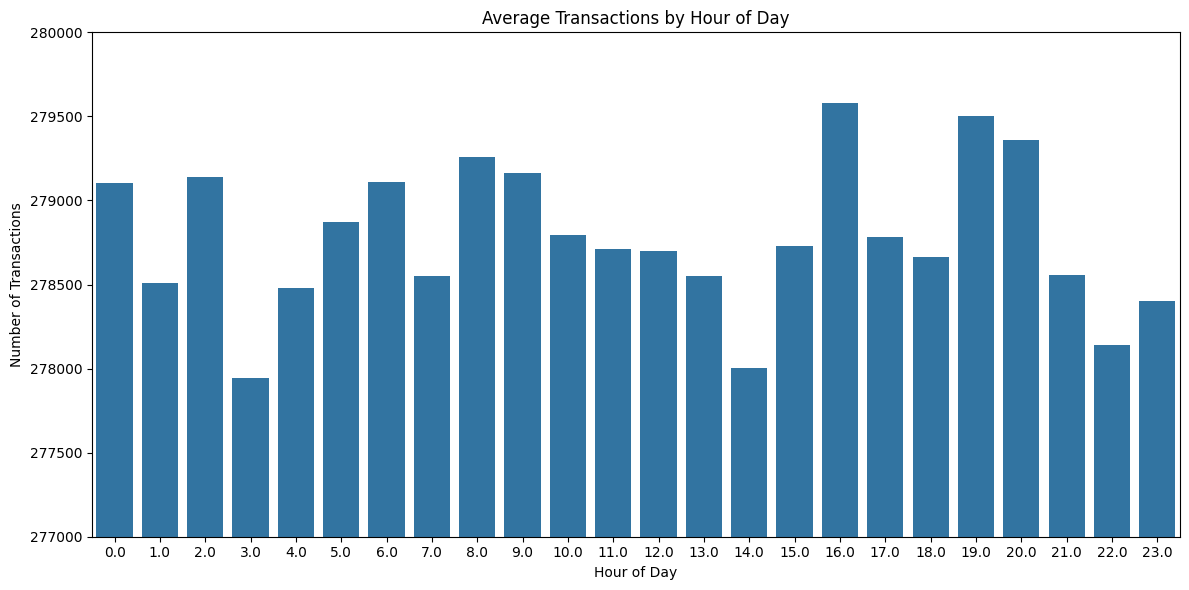

In [22]:
# Plotting bar chart and formatting
plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_transactions.index, y=hourly_transactions.values)
plt.ylim(277000, 280000)
plt.title('Average Transactions by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')
plt.xticks(range(24))
plt.tight_layout()
plt.show()

In [9]:
#8 Is there a difference from week days and weekends?
# Create a new column for the day of the week
sales_df['day_of_week'] = sales_df.index.dayofweek  # Monday=0, Sunday=6

# Weekdays (Monday to Thursday)
weekdays = sales_df[sales_df['day_of_week'].isin([0, 1, 2, 3])]

# Weekends (Friday to Sunday)
weekends = sales_df[sales_df['day_of_week'].isin([4, 5, 6])]

# Group by hour and count transactions for weekdays and weekends
weekday_transactions = weekdays.groupby(weekdays.index.hour).size()
weekend_transactions = weekends.groupby(weekends.index.hour).size()

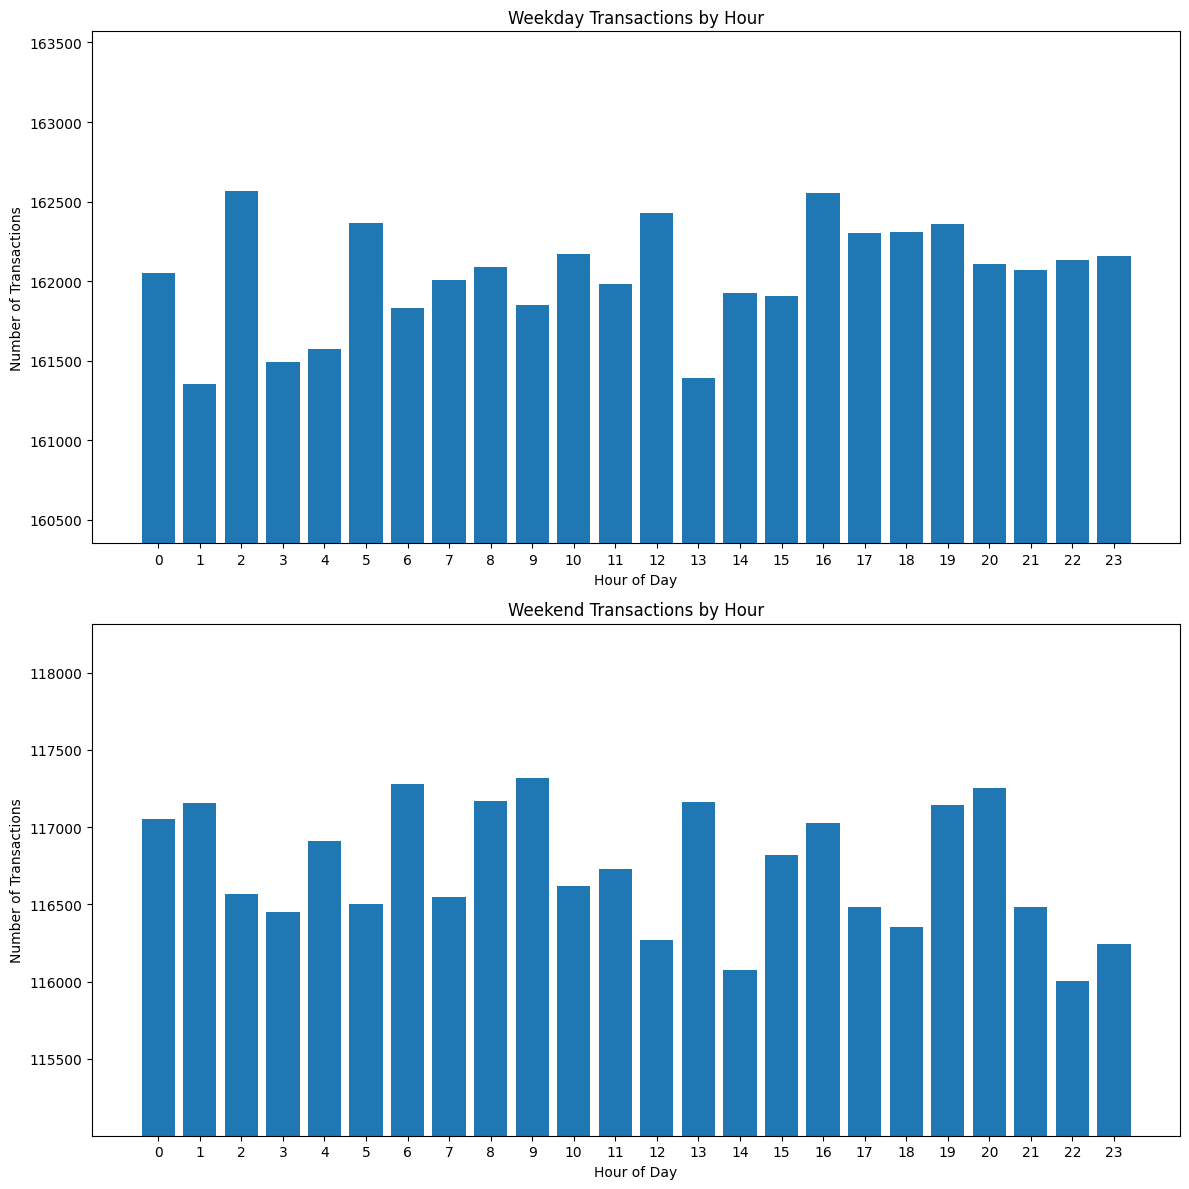

In [10]:
# Create two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# Plot weekday transactions
ax1.bar(weekday_transactions.index, weekday_transactions.values)
ax1.set_title('Weekday Transactions by Hour')
ax1.set_xlabel('Hour of Day')
ax1.set_ylabel('Number of Transactions')
ax1.set_xticks(range(24))

# Adjust y-axis for weekday plot
weekday_min = weekday_transactions.min()
weekday_max = weekday_transactions.max()
ax1.set_ylim(weekday_min - 1000, weekday_max + 1000)

# Plot weekend transactions
ax2.bar(weekend_transactions.index, weekend_transactions.values)
ax2.set_title('Weekend Transactions by Hour')
ax2.set_xlabel('Hour of Day')
ax2.set_ylabel('Number of Transactions')
ax2.set_xticks(range(24))

# Adjust y-axis for weekend plot
weekend_min = weekend_transactions.min()
weekend_max = weekend_transactions.max()
ax2.set_ylim(weekend_min - 1000, weekend_max + 1000)

plt.tight_layout()
plt.show()